In [135]:
from IPython.display import Image
%matplotlib inline
import pandas as pd
from io import StringIO
import os
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [136]:
df = pd.read_csv('autos.csv', encoding='latin-1')
df.head(1)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57


# Dealing with missing data

In [137]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

### Binning

In [138]:
# binning on the column powerPS
bins = [0, .2, .4, .6, .8, 1]
df['binned'] = pd.cut(df['powerPS'], bins)
print (df)


                dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \

## Eliminating samples or features with missing values

In [139]:
# deletes these columns because they are not importatnt
#df.drop(['nrOfPictures', 'dateCrawled','dateCreated', 'lastSeen'], axis = 1)

In [140]:
df = df.dropna()
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,binned
34798,2016-03-23 12:55:57,smart_klima_tuev_bis_05/2017,privat,Angebot,3900,control,cabrio,2004,automatik,1,...,90000,5,benzin,smart,nein,2016-03-23 00:00:00,0,85386,2016-04-05 12:45:16,"(0.8, 1.0]"
55516,2016-03-07 19:53:06,Opel_Kadett_C_Scheunenfund_1._Serie_Trommelbre...,privat,Angebot,990,control,coupe,1974,manuell,1,...,5000,3,benzin,opel,ja,2016-03-07 00:00:00,0,94036,2016-03-10 04:44:22,"(0.8, 1.0]"
98946,2016-03-22 13:38:51,Golf_Cabrio_zum_Schlachten_ohne_Motor,privat,Angebot,300,control,cabrio,1997,manuell,1,...,5000,4,diesel,volkswagen,ja,2016-03-22 00:00:00,0,83395,2016-04-04 01:15:36,"(0.8, 1.0]"
159047,2016-03-29 12:59:20,Opel_Astra_1.4_fur_Ersatzteile,privat,Angebot,1,test,limousine,1994,manuell,1,...,150000,4,benzin,opel,ja,2016-03-29 00:00:00,0,89443,2016-04-05 22:46:39,"(0.8, 1.0]"
169328,2016-03-23 21:06:33,Wahatsap_bitte,privat,Angebot,900,control,kombi,1998,manuell,1,...,5000,5,andere,fiat,nein,2016-03-23 00:00:00,0,56412,2016-04-07 00:15:56,"(0.8, 1.0]"


In [141]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,binned
34798,2016-03-23 12:55:57,smart_klima_tuev_bis_05/2017,privat,Angebot,3900,control,cabrio,2004,automatik,1,...,90000,5,benzin,smart,nein,2016-03-23 00:00:00,0,85386,2016-04-05 12:45:16,"(0.8, 1.0]"
55516,2016-03-07 19:53:06,Opel_Kadett_C_Scheunenfund_1._Serie_Trommelbre...,privat,Angebot,990,control,coupe,1974,manuell,1,...,5000,3,benzin,opel,ja,2016-03-07 00:00:00,0,94036,2016-03-10 04:44:22,"(0.8, 1.0]"
98946,2016-03-22 13:38:51,Golf_Cabrio_zum_Schlachten_ohne_Motor,privat,Angebot,300,control,cabrio,1997,manuell,1,...,5000,4,diesel,volkswagen,ja,2016-03-22 00:00:00,0,83395,2016-04-04 01:15:36,"(0.8, 1.0]"
159047,2016-03-29 12:59:20,Opel_Astra_1.4_fur_Ersatzteile,privat,Angebot,1,test,limousine,1994,manuell,1,...,150000,4,benzin,opel,ja,2016-03-29 00:00:00,0,89443,2016-04-05 22:46:39,"(0.8, 1.0]"
169328,2016-03-23 21:06:33,Wahatsap_bitte,privat,Angebot,900,control,kombi,1998,manuell,1,...,5000,5,andere,fiat,nein,2016-03-23 00:00:00,0,56412,2016-04-07 00:15:56,"(0.8, 1.0]"
172294,2016-03-19 20:46:44,Gepflegter_Caddy__wenig_Kilometer__schwarz,privat,Angebot,6800,control,bus,2005,manuell,1,...,125000,12,diesel,volkswagen,nein,2016-03-19 00:00:00,0,25813,2016-04-07 08:46:26,"(0.8, 1.0]"
206502,2016-04-05 11:37:54,Polo_1_Audi_50_Ersatzteilspender_zum_ausschlac...,privat,Angebot,500,test,kleinwagen,1975,manuell,1,...,150000,8,benzin,volkswagen,nein,2016-04-05 00:00:00,0,33442,2016-04-05 11:37:54,"(0.8, 1.0]"
230841,2016-03-05 14:17:23,Opel_Vectra_in_Koblenz,privat,Angebot,700,test,kombi,1998,manuell,1,...,150000,4,benzin,opel,nein,2016-03-04 00:00:00,0,56070,2016-03-12 22:18:10,"(0.8, 1.0]"
282070,2016-03-08 19:42:57,MAZDA_323__2002b.____TÜF__12.2016__EXTRA_RADIO...,privat,Angebot,1200,test,limousine,2002,manuell,1,...,150000,12,benzin,mazda,nein,2016-03-08 00:00:00,0,13409,2016-03-12 20:20:18,"(0.8, 1.0]"
288385,2016-03-08 11:38:54,**_Golf_3**_in_Klassikrot_LA3G_91_98__3_Tuerig...,privat,Angebot,200,control,limousine,1992,manuell,1,...,100000,12,benzin,volkswagen,ja,2016-03-08 00:00:00,0,47506,2016-03-10 02:46:26,"(0.8, 1.0]"


### SubPlots before 

C:\Users\Ferdi\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


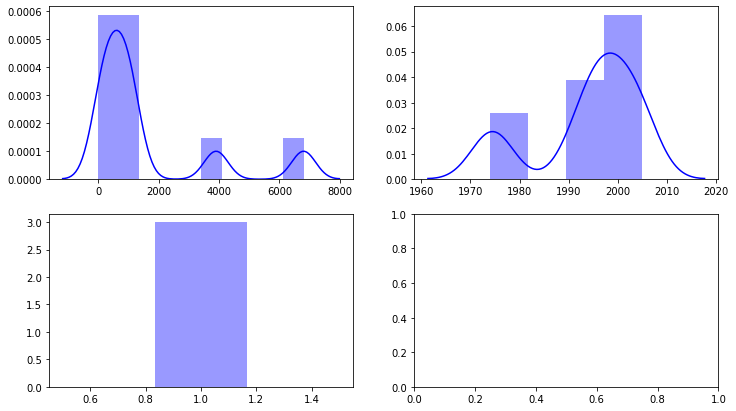

In [142]:

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

a = df['price'].values
b = df['yearOfRegistration'].values
c = df['powerPS'].values


# plot 1

sns.distplot(a, color = 'blue', ax=axes[0,0])
axes[0,0].set_title = 'Total Bill'

# plot 2
sns.distplot(b, color = 'blue', ax=axes[0,1])

# plot 3
sns.distplot(c, color = 'blue', ax=axes[1,0])

# Partitioning a dataset in training and test sets

In [143]:
# declare our target and features
features = ['price', 'yearOfRegistration',"powerPS","kilometer","monthOfRegistration"]
target = ['price']

In [144]:

X = df[features]
y = df[target]

## Standardization (Scaling)

In [145]:
# we will standardize values in these three columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(df[['kilometer',"yearOfRegistration","price"]])

In [146]:
X

array([[-0.04911438,  0.96700541,  1.15327533],
       [-1.44068836, -1.90528788, -0.27427633],
       [-1.44068836,  0.29680364, -0.61276797],
       [ 0.93317314,  0.00957431, -0.75944767],
       [-1.44068836,  0.39254675, -0.31842742],
       [ 0.52388668,  1.06274852,  2.57592131],
       [ 0.93317314, -1.80954477, -0.51465445],
       [ 0.93317314,  0.39254675, -0.41654093],
       [ 0.93317314,  0.77551919, -0.17125714],
       [ 0.11460021, -0.18191191, -0.66182472]])

### Train test split

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8, 3) (8, 1)
(2, 3) (2, 1)


In [149]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[3900.],
       [1200.]])

In [151]:
y_test.describe()

,price
count,2.000000
mean,2550.000000
std,1909.188309
min,1200.000000
25%,1875.000000
50%,2550.000000
75%,3225.000000
max,3900.000000


In [152]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [153]:
print(RMSE)

1.0294781007061621e-12
